# ***SIP LAB 7***
Krisha Chemburkar

I012

B1 Batch

Semester IV

BTech AI


# ***Aim:***
    a. Apply Sobel’s mask on the given test image to obtain component of gradient |𝑔𝑥|,|𝑔𝑦|𝑎𝑛𝑑 |𝑔𝑥+𝑔𝑦|

    b. Apply 5x5 averaging filter on the test image and then implement the sequence in step a.

    c. Summarize your observations after comparing the results obtained in step a and b

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [20]:
img = cv2.imread("/content/Fig1016(a)(building_original).tif",0)

In [21]:
m,n = img.shape

## ***Edge Detection Before Applying Average Filtering***

In [22]:
mask_fx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
mask_fy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
mask_d = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])


In [23]:
img_h = np.zeros((m,n))
img_v = np.zeros((m,n))
img_d = np.zeros((m,n))
img_all = np.zeros((m,n))

for i in range(1,m-1):
  for j in range(1,n-1):
    img_h[i,j]=np.sum(np.multiply(mask_fx, img[i-1:i+2,j-1:j+2]))

In [24]:
for i in range(1,m-1):
  for j in range(1,n-1):
    img_v[i,j]=np.sum(np.multiply(mask_fy, img[i-1:i+2,j-1:j+2]))

In [25]:

for i in range(1,m-1):
  for j in range(1,n-1):
    img_d[i,j]=np.sum(np.multiply(mask_d, img[i-1:i+2,j-1:j+2]))

In [26]:
img_all = img_h+img_v+img_d

Text(0.5, 1.0, 'All')

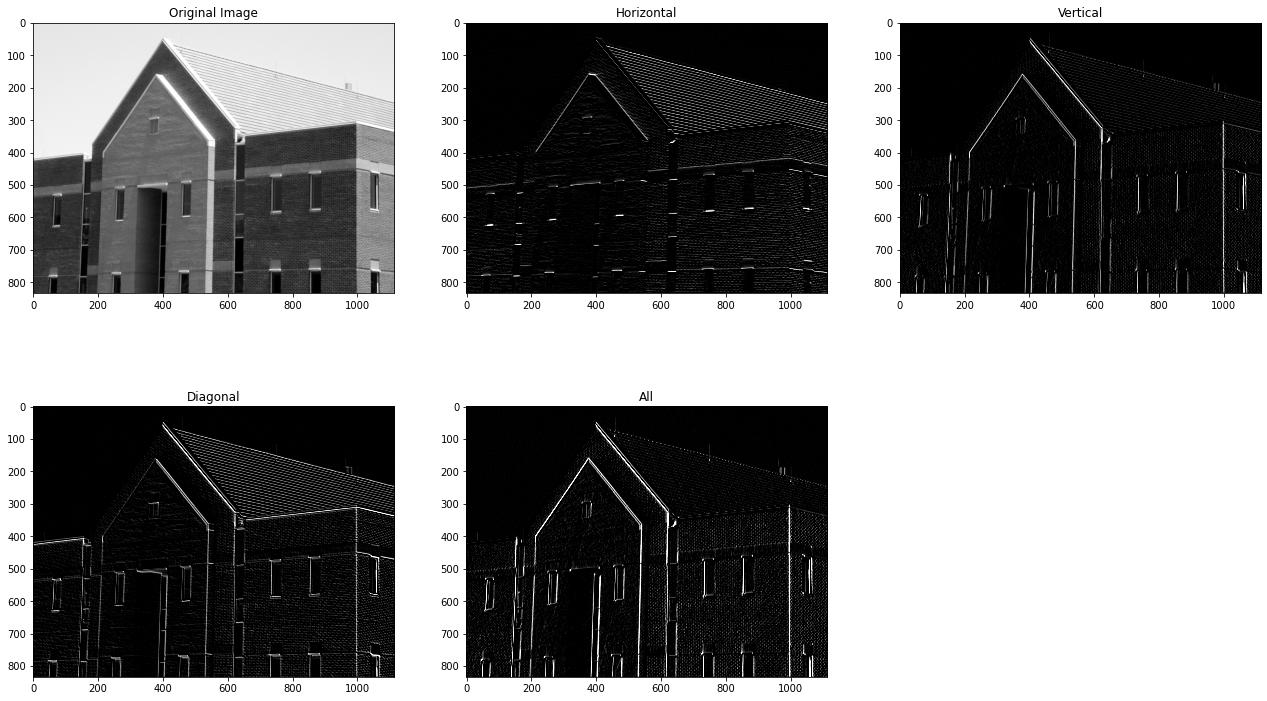

In [27]:
plt.figure(figsize=(22,20))
plt.subplot(3,3,1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.subplot(3,3,2)
plt.imshow(img_h,cmap="gray", vmin = 0, vmax = 255)
plt.title("Horizontal")
plt.subplot(3,3,3)
plt.imshow(img_v,cmap="gray", vmin = 0, vmax = 255)
plt.title("Vertical")
plt.subplot(3,3,4)
plt.imshow(img_d,cmap="gray", vmin = 0, vmax = 255)
plt.title("Diagonal")
plt.subplot(3,3,5)
plt.imshow(img_all,cmap="gray", vmin = 0, vmax = 255)
plt.title("All")

## ***Edge Detection After Applying Average Filtering***

In [28]:
def npsd(ms, img):
  img_ret = np.zeros((img.shape), dtype=int)
  b= ms
  #applying neighbourhoof processing 
  for i in range(b,m-b):
      for j in range(b,n-b):
          temp= img[i-b:i+b+1,j-b:j+b+1] 
          
          constant= np.sum(temp)
          img_ret[i,j]= constant//b**2
  return img_ret

In [29]:
img_sd = npsd(5,img)

Text(0.5, 1.0, 'Average filtering')

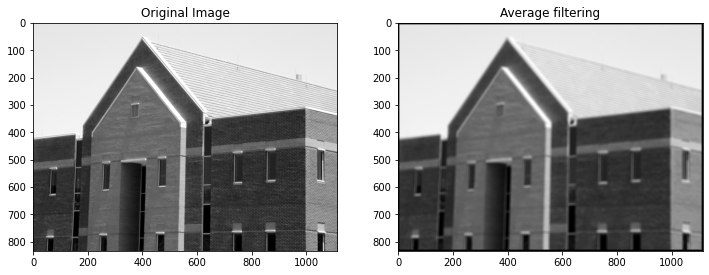

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray", vmin = 0, vmax = 255)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img_sd,cmap="gray")
plt.title("Average filtering")


In [31]:
img_sdh = np.zeros((m,n))
img_sdv = np.zeros((m,n))
img_sdd = np.zeros((m,n))
img_sdall = np.zeros((m,n))

In [32]:

for i in range(1,m-1):
  for j in range(1,n-1):
    img_sdh[i,j]=(np.multiply(mask_fx, img_sd[i-1:i+2,j-1:j+2])).sum()

In [33]:

for i in range(1,m-1):
  for j in range(1,n-1):
    img_sdv[i,j]=np.sum(np.multiply(mask_fy, img_sd[i-1:i+2,j-1:j+2]))

In [34]:

for i in range(1,m-1):
  for j in range(1,n-1):
    img_sdd[i,j]=np.sum(np.multiply(mask_d, img_sd[i-1:i+2,j-1:j+2]))

In [35]:
img_sdall = img_sdh+img_sdv+img_sdd

Text(0.5, 1.0, 'All')

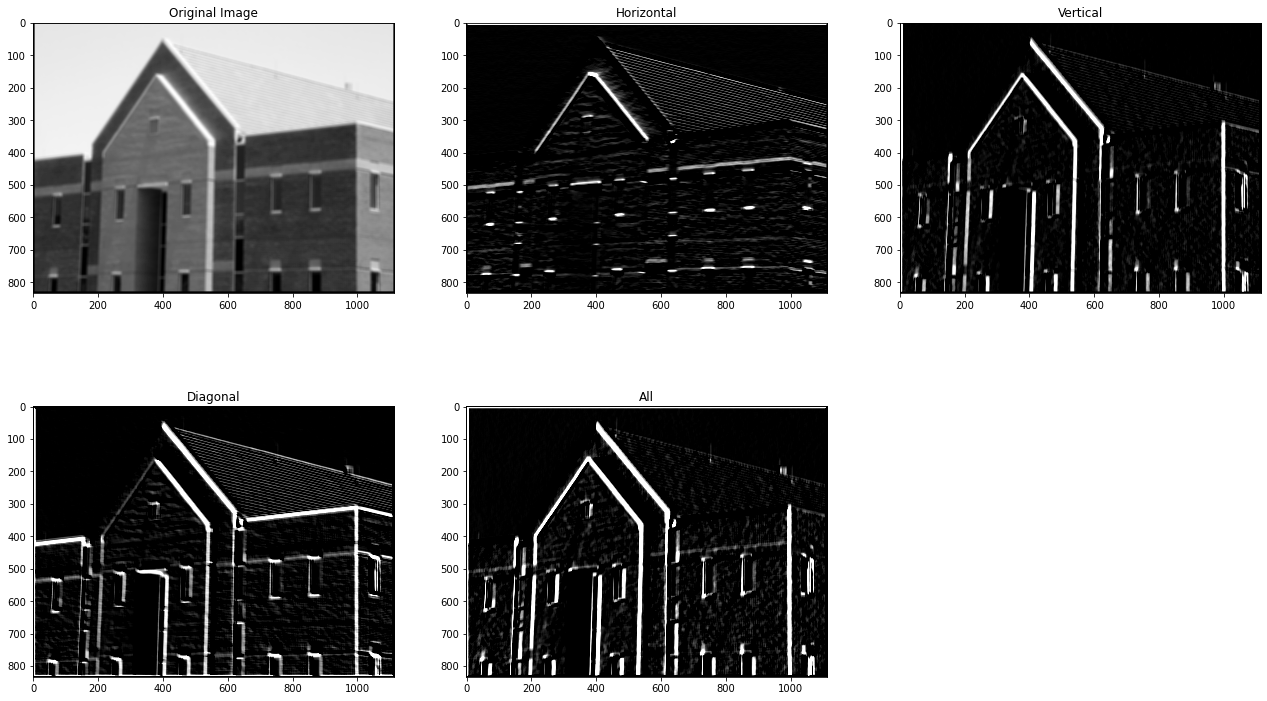

In [36]:
plt.figure(figsize=(22,20))
plt.subplot(3,3,1)
plt.imshow(img_sd,cmap="gray")
plt.title("Original Image")
plt.subplot(3,3,2)
plt.imshow(img_sdh,cmap="gray", vmin = 0, vmax = 255)
plt.title("Horizontal")
plt.subplot(3,3,3)
plt.imshow(img_sdv,cmap="gray", vmin = 0, vmax = 255)
plt.title("Vertical")
plt.subplot(3,3,4)
plt.imshow(img_sdd,cmap="gray", vmin = 0, vmax = 255)
plt.title("Diagonal")
plt.subplot(3,3,5)
plt.imshow(img_sdall,cmap="gray", vmin = 0, vmax = 255)
plt.title("All")

# ***Conclusion***
In this experiment, we apply Solbel's mask to implement edge detection.

In the first part, we apply the mask directly on the image without making any alterations. We plot the images with its horizontal, vertical, diagonal and finally all the edges. The edges are visible and clear. 

In the next part, we apple the mask after implementing average filtering of mask size 5. We again plot the images highlighting its horizontal, vertical, diagonal and finally all the edges. We notice that, after the image is filtered its edges are much more distinct and comprehensible compared to the original one.